In [1]:
import pandas as pd, numpy as np, requests, sklearn, ast, seaborn as sns, matplotlib.pyplot as plt, urllib.request, json 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.utils import shuffle
from sklearn import preprocessing
from pandas.io.json import json_normalize

In [2]:
response = requests.get("https://data.montgomerycountymd.gov/resource/mmzv-x632.json", stream='True')
print(response.status_code)
print(response.json())



200
[{'report_number': 'HA2468000J', 'local_case_number': '21000448', 'agency_name': 'Maryland-National Capital', 'acrs_report_type': 'Property Damage Crash', 'crash_date_time': '2021-03-18T16:01:00.000', 'off_road_description': '14100 GRAND PRE RD', 'collision_type': 'SINGLE VEHICLE', 'weather': 'RAINING', 'light': 'DAYLIGHT', 'traffic_control': 'NO CONTROLS', 'driver_substance_abuse': 'NONE DETECTED', 'person_id': 'E18F4B57-2A8F-491F-AB2A-BE1761353683', 'driver_at_fault': 'Yes', 'injury_severity': 'NO APPARENT INJURY', 'circumstance': 'RAIN, SNOW, WET', 'driver_distracted_by': 'UNKNOWN', 'drivers_license_state': 'XX', 'vehicle_id': 'FD09CF28-E1FE-41E8-A63F-C48346A389C9', 'vehicle_damage_extent': 'DISABLING', 'vehicle_first_impact_location': 'TWELVE OCLOCK', 'vehicle_second_impact_location': 'TWELVE OCLOCK', 'vehicle_body_type': 'PASSENGER CAR', 'vehicle_movement': 'UNKNOWN', 'vehicle_continuing_dir': 'South', 'vehicle_going_dir': 'South', 'speed_limit': '35', 'driverless_vehicle': 'N

In [3]:
URL = "https://data.montgomerycountymd.gov/resource/mmzv-x632.json"
df = pd.read_json(URL)
df.info()
df1 = pd.DataFrame(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   report_number                   1000 non-null   object        
 1   local_case_number               1000 non-null   int64         
 2   agency_name                     1000 non-null   object        
 3   acrs_report_type                1000 non-null   object        
 4   crash_date_time                 1000 non-null   datetime64[ns]
 5   off_road_description            86 non-null     object        
 6   collision_type                  1000 non-null   object        
 7   weather                         1000 non-null   object        
 8   light                           1000 non-null   object        
 9   traffic_control                 1000 non-null   object        
 10  driver_substance_abuse          1000 non-null   object        
 11  perso

In [4]:
type(df1)
print(df1)


    report_number  local_case_number                agency_name  \
0      HA2468000J           21000448  Maryland-National Capital   
1     MCP3069004M          210010172   Montgomery County Police   
2     MCP3069004M          210010172   Montgomery County Police   
3     MCP209400H7          210010163   Montgomery County Police   
4     MCP209400H7          210010163   Montgomery County Police   
..            ...                ...                        ...   
995   MCP32090027          210005836   Montgomery County Police   
996   MCP3058003Z          210005832   Montgomery County Police   
997   MCP31640042          210005812   Montgomery County Police   
998   MCP31640042          210005812   Montgomery County Police   
999   MCP31640042          210005812   Montgomery County Police   

          acrs_report_type     crash_date_time  \
0    Property Damage Crash 2021-03-18 16:01:00   
1    Property Damage Crash 2021-03-18 14:00:00   
2    Property Damage Crash 2021-03-18 14:00:0

In [5]:
df1.dropna()

print(df1['report_number'])

0       HA2468000J
1      MCP3069004M
2      MCP3069004M
3      MCP209400H7
4      MCP209400H7
          ...     
995    MCP32090027
996    MCP3058003Z
997    MCP31640042
998    MCP31640042
999    MCP31640042
Name: report_number, Length: 1000, dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   report_number                   1000 non-null   object        
 1   local_case_number               1000 non-null   int64         
 2   agency_name                     1000 non-null   object        
 3   acrs_report_type                1000 non-null   object        
 4   crash_date_time                 1000 non-null   datetime64[ns]
 5   off_road_description            86 non-null     object        
 6   collision_type                  1000 non-null   object        
 7   weather                         1000 non-null   object        
 8   light                           1000 non-null   object        
 9   traffic_control                 1000 non-null   object        
 10  driver_substance_abuse          1000 non-null   object        
 11  perso

Text(0, 0.5, 'Accident Count')

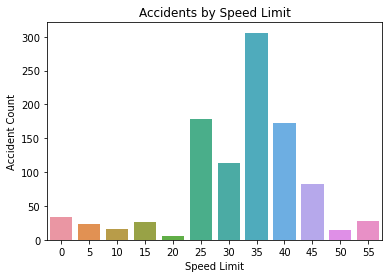

In [6]:
df1.info()

df1.speed_limit.value_counts()

sns.countplot(x = df.speed_limit)
plt.title('Accidents by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Accident Count')


In [7]:
df1.speed_limit.value_counts()
df1.injury_severity.value_counts()

injurydummies = pd.get_dummies(df1.injury_severity)
print(injurydummies)

df1.loc[:, 'no_apparent_injury'] = injurydummies['NO APPARENT INJURY']
df1.loc[:, 'possible_injury'] = injurydummies['POSSIBLE INJURY']
df1.loc[:, 'suspected_minor_injury'] = injurydummies['SUSPECTED MINOR INJURY']
df1.loc[:, 'suspected_serious_injury'] = injurydummies['SUSPECTED SERIOUS INJURY']
print(df1)

     NO APPARENT INJURY  POSSIBLE INJURY  SUSPECTED MINOR INJURY  \
0                     1                0                       0   
1                     1                0                       0   
2                     1                0                       0   
3                     1                0                       0   
4                     1                0                       0   
..                  ...              ...                     ...   
995                   1                0                       0   
996                   1                0                       0   
997                   1                0                       0   
998                   1                0                       0   
999                   1                0                       0   

     SUSPECTED SERIOUS INJURY  
0                           0  
1                           0  
2                           0  
3                           0  
4                      

In [17]:
X1 = df1.
Y1 = df1.injury_severity

X1.head()
print(X1)

AttributeError: 'Series' object has no attribute 'columns'

In [10]:
Y1.head()

0    NO APPARENT INJURY
1    NO APPARENT INJURY
2    NO APPARENT INJURY
3    NO APPARENT INJURY
4    NO APPARENT INJURY
Name: injury_severity, dtype: object

In [11]:
Y1.value_counts()

NO APPARENT INJURY          827
POSSIBLE INJURY              88
SUSPECTED MINOR INJURY       74
SUSPECTED SERIOUS INJURY     11
Name: injury_severity, dtype: int64

In [12]:
#splitting data into training and testing data
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 42)

In [13]:
#Instantiate
LogReg1 = LogisticRegression(max_iter = 1000)

In [14]:
#Preprocessing using standard scalar
scal = preprocessing.StandardScaler()
X1_train = scal.fit_transform(X1_train)
X1_test = scal.transform(X1_test)

ValueError: Expected 2D array, got 1D array instead:
array=[35. 30.  0. 35. 40. 35.  5. 35. 30. 35. 35. 25. 35. 30. 40. 30. 45. 25.
 30. 40. 35. 35. 25. 35. 35. 30. 40. 45. 35.  0. 40. 45. 15. 25. 25. 45.
 35. 25. 35. 40. 25. 45.  0. 25.  5. 30. 30.  0. 35. 40. 35. 30. 35. 25.
 35. 40. 35. 35. 25. 35. 35. 35. 40. 35. 35. 35. 35. 45. 10. 30. 40. 35.
 35. 35. 35. 35. 35. 35.  5. 40. 35.  0. 25. 15. 35. 25. 35. 40. 30. 25.
 30. 30. 45. 30. 40. 45. 30. 50. 40. 35. 20. 35. 55.  0. 35. 40. 25. 15.
 20. 40. 25. 40. 25. 25. 55. 40. 45. 35. 35. 45. 35. 40. 40. 45. 35. 35.
 30. 35. 30. 35. 35. 35. 30. 45. 55. 25. 35. 40. 45. 45. 25. 25. 35. 55.
 25. 25. 30. 35. 35. 35. 35. 35. 30. 35. 25. 15.  0. 25. 35. 35. 25. 35.
 30. 45. 25. 25. 35. 15. 55. 35. 25. 25. 35. 25. 40. 35. 25. 45. 45. 35.
 25.  0. 45. 40. 40. 35.  5. 35. 35. 35. 35. 25.  5. 50. 25.  0. 30. 35.
 45. 35. 30. 35. 40. 55. 40. 45. 25. 35. 35. 25. 30. 40. 25. 40. 35.  0.
 45. 40. 35. 25. 45. 40. 25. 40. 35.  0. 30. 40. 35. 35. 40. 40. 25. 40.
 45. 40. 40. 40. 35. 35. 30. 40. 15. 30. 40. 30. 35. 40. 45. 35. 40.  5.
  5. 30. 15. 40. 35. 25. 25. 45. 25. 40. 35. 30. 35. 35. 35. 35. 10. 20.
 30. 40. 25. 25. 25. 35. 55. 35. 10. 40. 25. 15. 25. 40.  0. 15.  5. 45.
 45. 30. 40. 35.  0. 35. 45. 40. 40. 25. 45. 30. 45. 30. 25. 40. 35. 35.
 35. 40. 35. 25. 35. 35. 55. 35. 45. 35. 45. 30. 35. 25. 35. 30.  0. 30.
 40. 25. 35. 30. 40. 45. 25. 40. 25. 50. 40. 40. 40. 40. 45. 35.  0. 35.
 30. 35. 40. 40. 35. 30. 40. 40. 25. 25. 35. 25. 35. 25. 35. 40. 35. 35.
 40. 25. 35. 35. 25. 35. 30. 25. 35. 35. 30. 15. 35. 45. 30. 30. 40.  5.
 40. 25. 25. 40. 40. 35. 50. 35. 40. 45. 25. 25. 35. 30. 25. 35. 45. 30.
 35. 15. 30. 45. 35. 35.  0. 35. 25. 35. 35. 35. 55. 35. 25. 45. 35. 30.
 55. 30. 25. 35. 25. 45. 40. 45. 30. 35. 35. 35. 25. 15. 25. 30. 35.  0.
 30. 30. 40. 10. 25. 25. 40. 35. 35. 40. 25. 45. 35. 35. 40.  0. 30. 35.
 35. 35. 55. 35. 55. 55. 40. 35. 35. 25. 30. 50. 25. 40. 35.  0. 35. 35.
 40. 35. 55. 40. 40. 40. 35. 30. 35. 30. 35. 45. 25. 40. 40. 35. 35. 45.
 15. 25. 45. 30. 10. 30. 35. 35. 35. 35. 25. 35. 35. 35. 35. 35. 35. 25.
 15. 35. 40. 35. 15. 35. 55. 40. 35. 45. 40. 35. 45. 30. 25. 45. 25. 35.
  5. 35. 45. 25. 30. 35. 35. 30. 35. 35. 40. 40. 25. 35. 45. 20. 25. 40.
 35. 35. 35. 35. 25. 40. 55.  0.  5. 35. 30. 55. 45. 35. 25. 25. 35. 45.
 35. 10. 35. 35. 50. 55. 55. 25. 35. 30. 40. 25. 35. 40. 25. 40. 30. 40.
 15. 30. 35. 35. 40. 10. 40. 40.  5. 45. 35. 35. 40. 40. 25. 25. 35. 35.
 25. 25.  5. 45.  0. 45. 35. 40. 35. 35. 25. 40. 25. 30. 40. 45. 35. 35.
 40. 45. 30. 45. 35.  5. 30. 40. 35. 25. 35.  5. 30. 25. 30. 35. 25. 15.
 25. 45. 40. 25. 30. 40. 50. 35. 50. 35. 35. 35. 50. 10. 35. 25. 25. 30.
 30. 10. 25. 35. 35. 40.  0. 35. 15. 30. 35. 40. 25. 35. 40. 35. 35. 35.
 45. 25. 40. 40. 35. 20. 25. 25. 40. 30. 35. 40. 25. 55. 25. 25. 25. 25.
 25. 25. 10. 35.  0. 15. 35. 35. 35. 25. 35. 30. 35. 15. 15. 35. 25. 30.
  0. 35.  0. 30. 40. 30. 30. 40. 25. 40. 55. 40. 25. 40. 40. 30. 15. 35.
 25.  0. 25. 25. 30. 15. 25. 30. 40. 40. 25. 40. 30. 35. 35. 35.  5. 40.
 40. 35. 25. 35. 40. 30. 45. 40. 35. 25. 40. 30.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df3 = pd.read_csv('mdotaadt.csv', dtype=object)
df3.head()

,X,Y,OBJECTID,LOCATION_ID,COUNTY_ID,COUNTY_DESC,MUN_SORT,MUNICIPALITY,ROADNAME,ID_PREFIX,ID_RTE_NO,MP_SUFFIX,ID_MP,BEGIN_SECTION,END_SECTION,STATION_DESC,ROAD_SECTION,RURAL_URBAN,F_SYSTEM,F_SYSTEM_DESC,ROUTEID,ROUTEID_RH,MAIN_LINE,PEAK_HOUR_DIRECTION,NUM_LANES,COUNTED_FACTORED,STMP_SEQ,K_FACTOR,D_FACTOR,NORTH_EAST_SPLIT,SOUTH_WEST_SPLIT,AVMT,LINK,AADT_2010,AADT_2011,AADT_2012,AADT_2013,AADT_2014,AADT_2015,AADT_2016,...,MCYCLE_AADT_PCT_OVERALL,CAR_AADT_PCT_OVERALL,LIGHT_TRUCK_AADT_PCT_OVERALL,BUS_AADT_PCT_OVERALL,SUTRUCK_AADT_PCT_OVERALL,CUTRUCK_AADT_PCT_OVERALL,TRUCK_AADT_PCT_OVERALL,NUM_LANES_ANNO,K_FACTOR_ANNO,D_FACTOR_ANNO,NORTH_EAST_SPLIT_ANNO,SOUTH_WEST_SPLIT_ANNO,AADT_2010_ANNO,AADT_2011_ANNO,AADT_2012_ANNO,AADT_2013_ANNO,AADT_2014_ANNO,AADT_2015_ANNO,AADT_2016_ANNO,AADT_2017_ANNO,AADT_2018_ANNO,AADT_ANNO,AAWDT_2010_ANNO,AAWDT_2011_ANNO,AAWDT_2012_ANNO,AAWDT_2013_ANNO,AAWDT_2014_ANNO,AAWDT_2015_ANNO,AAWDT_2016_ANNO,AAWDT_2017_ANNO,AAWDT_2018_ANNO,AAWDT_ANNO,MOTORCYCLE_AADT_ANNO,CAR_AADT_ANNO,BUS_AADT_ANNO,LIGHT_TRUCK_AADT_ANNO,SINGLE_UNIT_AADT_ANNO,COMBINATION_UNIT_AADT_ANNO,TRUCK_AADT_ANNO,ID_PREFIX_NAME
0,-8533742.1435,4784320.6852,1,S2009030042,3,Baltimore,0,None,Timonium Rd,CO,798,,1.88,1.34,1.98,Timonium Rd - .10 Mile East Of Mays Chapel Rd,Jenifer Rd To Mays Chapel Rd,Urban,5,Major Collector,03000CO00798 01WW**************,03000CO00798--1-----,1,East,2,F,0,11.01,63.61,56.93,43.07,0.8629,https://maps.roads.maryland.gov/itms_public/?s...,3481,3502,3473,3484,3475,3560,3631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,11.01,63.61,56.93,43.07,"3,481","3,502","3,473","3,484","3,475","3,560","3,631","3,722","3,693","3,694","3,731","3,782","3,753","3,764","3,725","3,810","3,891","3,952","3,923","4,064",NaN,NaN,NaN,NaN,NaN,NaN,NaN,CO
1,-8514936.5869,4719225.7214,2,B0740,2,Anne Arundel,0,None,King George St,MD,450,,12.88,12.46,13.42,Md450-.10 Mi W Of College Ave,Main St To Md 435,Urban,4,Minor Arterial,02000MD00450 01EE**************,02000MD00450--1-----,1,East,2,F,2,7.36,68.52,48.39,51.61,3.6305,https://maps.roads.maryland.gov/itms_public/?s...,10991,11042,10390,10411,10382,9710,9891,...,0.00357108387221311,0.893543094295917,0.085030402470804,0.0029919891902326,0.0140913039281923,0.000772126242640672,0.0148634301708329,2,7.36,68.52,48.39,51.61,"10,991","11,042","10,390","10,411","10,382","9,710","9,891","10,132","10,360","10,361","11,761","11,932","11,220","11,241","11,112","10,390","10,581","10,842","11,090","10,981",37,"9,258",31,881,146,8,154,MD
2,-8570494.6832,4653970.1975,3,B1761,8,Charles,0,None,Port Tobacco Rd,MD,6,,24.75,22.95,25.21,Md6-.60 Mi W Of Us301,Chapel Point Rd To Us 301,Rural,5,Major Collector,08000MD00006 01EE**************,08000MD00006--1-----,1,West,2,F,1,8.99,51.54,50.08,49.92,8.2597,https://maps.roads.maryland.gov/itms_public/?s...,9740,9781,9702,9723,9694,9955,9860,...,0.00239688405073405,0.690602217117747,0.226705283131929,0.0111854589034255,0.0576250873863977,0.0114850694097673,0.069110156796165,2,8.99,51.54,50.08,49.92,"9,740","9,781","9,702","9,723","9,694","9,955","9,860","10,101","10,012","10,013","10,420","10,561","10,482","10,503","10,374","10,655","10,550","10,811","10,712","10,613",24,"6,915",112,"2,270",577,115,692,MD
3,-8542958.3353,4766529.9186,4,S1999030111,3,Baltimore,0,None,Ramp 3 Fr Md 122 Eb To Ramp 2 (to Is695),RP,695,,0.02,0,0.05,Exit 17 Ramp 3 Fr Md 122 Eb To Ramp 2 (to Is 6...,Exit 17 Ramp 03 Security Blvd To Ramp 2 Fr Md ...,Urban,1,Interstate,03000RP00695 02NNIS17 03,03000RP00695--101703,2,North,1,F,0,10.46,100,100,0,0.1155,https://maps.roads.maryland.gov/itms_public/?s...,NaN,NaN,5240,5291,5292,5423,4880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10.46,100,100,0,NaN,NaN,"5,240","5,291","5,292","5,423","4,880","5,001","6,290","6,331",NaN,NaN,"5,550","5,611","5,562","5,693","5,120","5,201","6,540","6,581",NaN,NaN,NaN,NaN,NaN,NaN,NaN,RP
4,-8520413.1814,4779663.9938,5,S2012030129,3,Baltimore,0,None,Waltham Woods Rd,CO,3534,,0.42,0,0.46,Waltham Woods Rd - Between Md 41 & Cider Mill Rd,Joppa Rd To Md 

In [ ]:
type(df2)
print(df2)

                                    error
code                                  500
details                                []
message  Error performing query operation
